In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from optStrat import OptStrat



df = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data.csv', index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Volume,Risk Free Rate
2015-07-20,277.98,280.00,277.37,280.00,782.883420,0.02372
2015-07-21,279.96,281.27,276.85,277.32,4943.559434,0.02340
2015-07-22,277.33,278.54,275.01,277.89,4687.909383,0.02322
2015-07-23,277.96,279.75,276.28,277.39,5306.919575,0.02277
2015-07-24,277.23,291.52,276.43,289.12,7362.469083,0.02271
...,...,...,...,...,...,...
2025-04-15,84590.36,86491.40,83592.77,83629.78,6460.941442,0.04323
2025-04-16,83622.52,85526.40,83088.02,84028.72,8243.059013,0.04279
2025-04-17,84028.71,85494.94,83711.69,84961.97,5862.464055,0.04333
2025-04-18,84961.97,85150.94,84287.06,84466.47,1884.039112,0.04333


# Finading the optimal trading strategy in Hindsight
- 1 will be buy
- -1 will be sell
- 0 will be hold

The goal is to maximize return while considering trasaction costs. We ignore the volatility adjustment here because it then becomes a non-convex optimization problem that is computationally infeasible. Furthermore, in hindsight the problem is deterministic and the concept of risk is incoherent so we ignore it.


## Defining the optimization problem
### Starting assumptions
we will reduce the labels to the following:
- 1 will be in the market (buy all that we can)
- 0 will be out of the market (sell all that we can)
This can then be trasnformed into our original labels easily.

We use dynamic programming for this



In [2]:
strat=OptStrat(df=df)

In [3]:
strat.df['Signals'].value_counts()

Signals
 0.0    2345
 1.0     609
-1.0     608
Name: count, dtype: int64

In [4]:
strat.df.head()

,Open,High,Low,Close,Volume,Risk Free Rate,Signals,Strategy Returns
2015-07-20,277.98,280.00,277.37,280.00,782.883420,0.02372,0.0,0.000000
2015-07-21,279.96,281.27,276.85,277.32,4943.559434,0.02340,1.0,-0.004936
2015-07-22,277.33,278.54,275.01,277.89,4687.909383,0.02322,0.0,0.002055
2015-07-23,277.96,279.75,276.28,277.39,5306.919575,0.02277,0.0,-0.001799
2015-07-24,277.23,291.52,276.43,289.12,7362.469083,0.02271,0.0,0.042287


<Axes: >

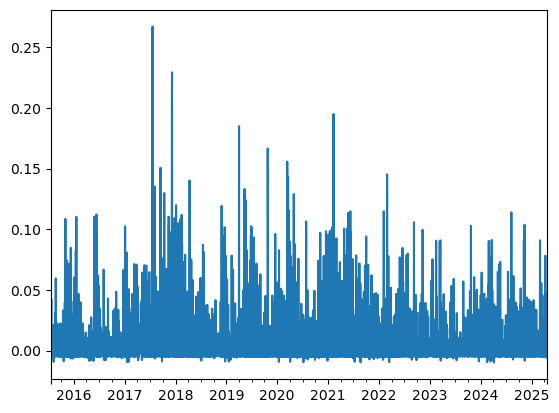

In [5]:
strat.df['Strategy Returns'].plot()

# Learning signals and predicting for the future

## Feature Engineering

## Getting Features

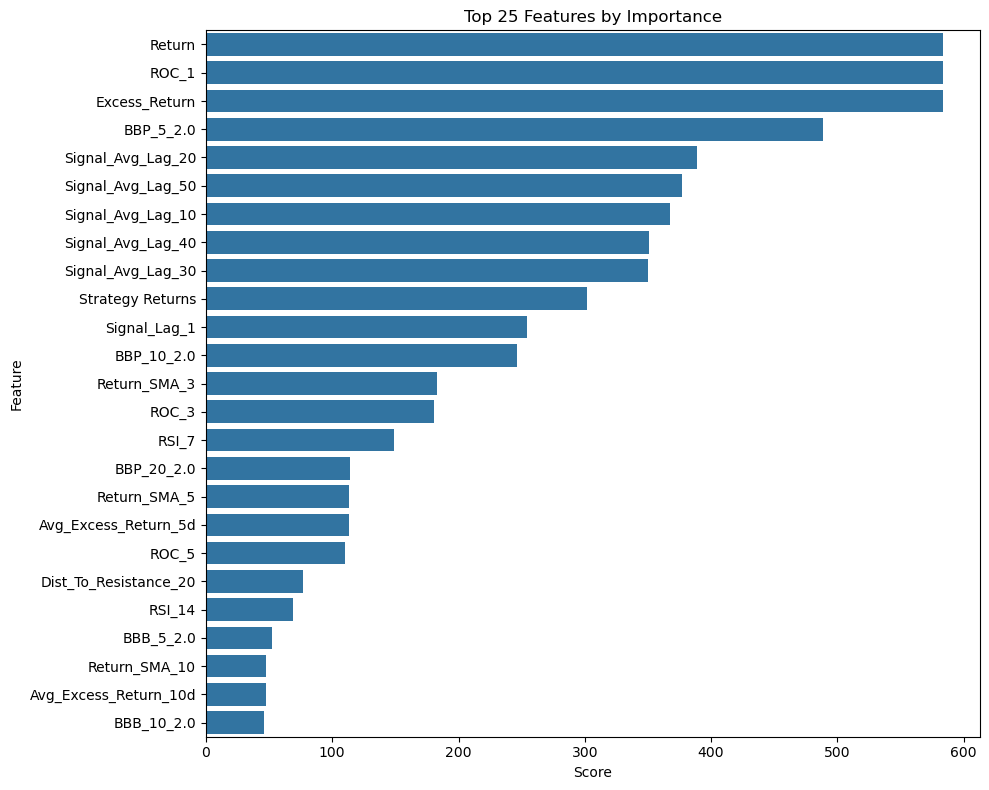

In [6]:
from features import FeatureEngineer


engineer = FeatureEngineer(df)
engineer.add_all_features()
X, y = engineer.get_feature_target_split()
X_best, scores, selected_features = engineer.select_best_features(k=25)   

## Cleaning and Preprocessing

In [7]:
def test_train_split(X, y, test_size=0.2):
    assert len(X) == len(y)
    n = len(X)
    test_size = int(n * test_size)
    X_train = X[:-test_size]
    X_test = X[-test_size:]
    y_train = y[:-test_size]
    y_test = y[-test_size:]
    return X_train, X_test, y_train, y_test

### Check Missing Values

In [8]:
X_selected = X[selected_features]

print('length of X_selected', len(X_selected))
print('length of y', len(y))

display(X_selected.isnull().sum().sort_values(ascending=False).head(3))



length of X_selected 3363
length of y 3363


Strategy Returns     0
RSI_7                0
Signal_Avg_Lag_40    0
dtype: int64

### Standardize Features

In [9]:
X_train, X_test, y_train, y_test = test_train_split(X_selected, y, test_size=0.2)

In [10]:
X_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Strategy Returns,3363.0,0.011187,0.023927,-0.009759,-0.000041,0.000114,0.015227,0.267020
Return,3363.0,0.002292,0.036565,-0.388124,-0.012798,0.001429,0.017300,0.272020
Return_SMA_3,3363.0,0.002289,0.020675,-0.129217,-0.007735,0.001700,0.012606,0.147661
Return_SMA_5,3363.0,0.002287,0.016135,-0.099503,-0.005573,0.001601,0.010603,0.101450
Return_SMA_10,3363.0,0.002279,0.011644,-0.049783,-0.003798,0.001548,0.008130,0.062427
ROC_1,3363.0,0.229202,3.656495,-38.812429,-1.279848,0.142917,1.730014,27.201980
ROC_3,3363.0,0.680434,6.246938,-38.785207,-2.370945,0.449902,3.732051,49.347646
ROC_5,3363.0,1.140982,8.174131,-45.434242,-2.945736,0.687738,5.208281,59.099983
BBB_5_2.0,3363.0,10.266978,7.861885,0.251722,4.761106,8.111919,13.665792,85.366932
BBP_5_2.0,3363.0,0.533175,0.285926,0.000363,0.283825,0.567415,0.778438,0.999399


In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

## Random Forest

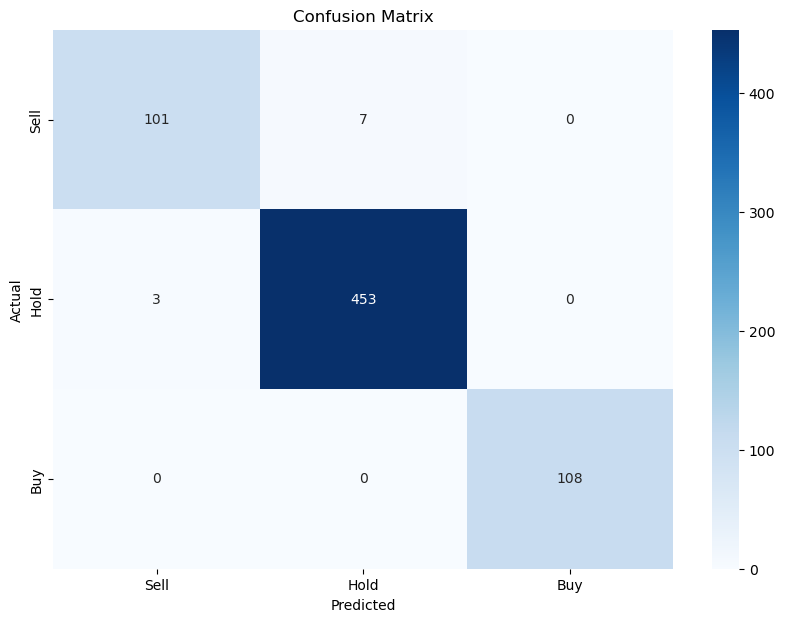

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(
    n_estimators=500, 
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)

decisions = pd.DataFrame(y_pred_proba, columns=['Sell', 'Hold', 'Buy'], index=X_test.index)

conf_matrix = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Hold', 'Buy'], yticklabels=['Sell', 'Hold', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Simulate Trade

In [13]:
btc_data = df[['Close', 'Risk Free Rate']]
trade_data = pd.merge(decisions, btc_data, left_index=True, right_index=True, how='left')
trade_data.head()



,Sell,Hold,Buy,Close,Risk Free Rate
2023-06-18,0.000,0.978,0.022,26336.46,0.03769
2023-06-19,0.004,0.996,0.000,26837.78,0.03769
2023-06-20,0.044,0.956,0.000,28320.43,0.03729
2023-06-21,0.048,0.952,0.000,29995.08,0.03723
2023-06-22,0.012,0.982,0.006,29886.31,0.03799


In [17]:
px.histogram(trade_data[['Sell', 'Hold', 'Buy']], barmode='group').show()

,Strategy,Buy & Hold
Annual Return,13.778309,0.892551
Volatility,0.343253,0.496767
Sharpe Ratio,40.016458,1.711056
Max Drawdown,-0.090729,-0.281724


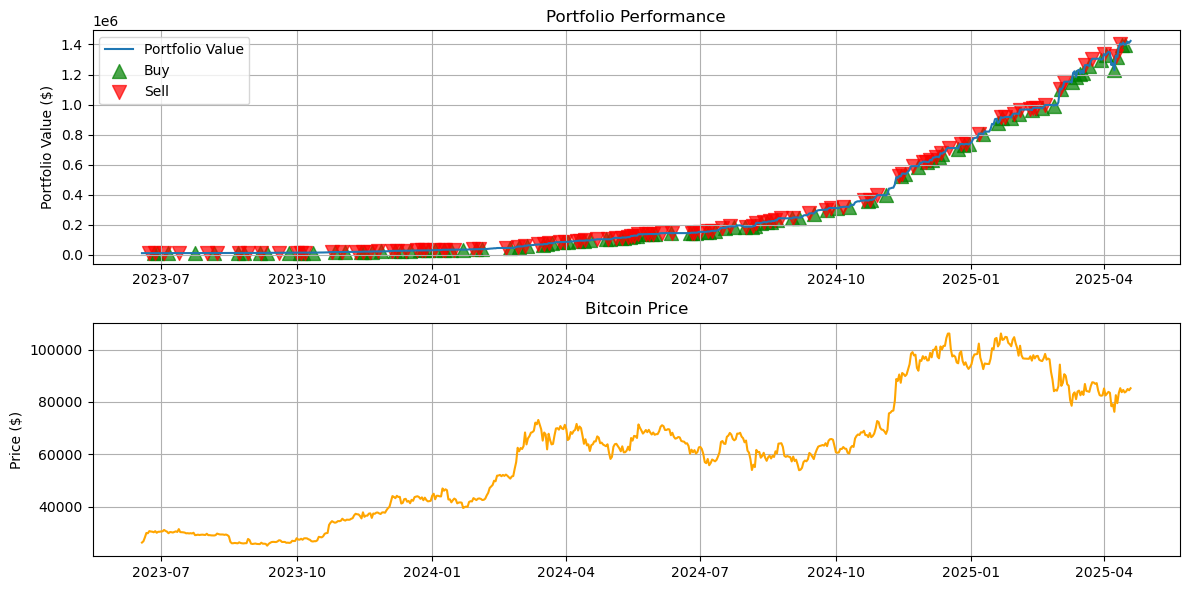

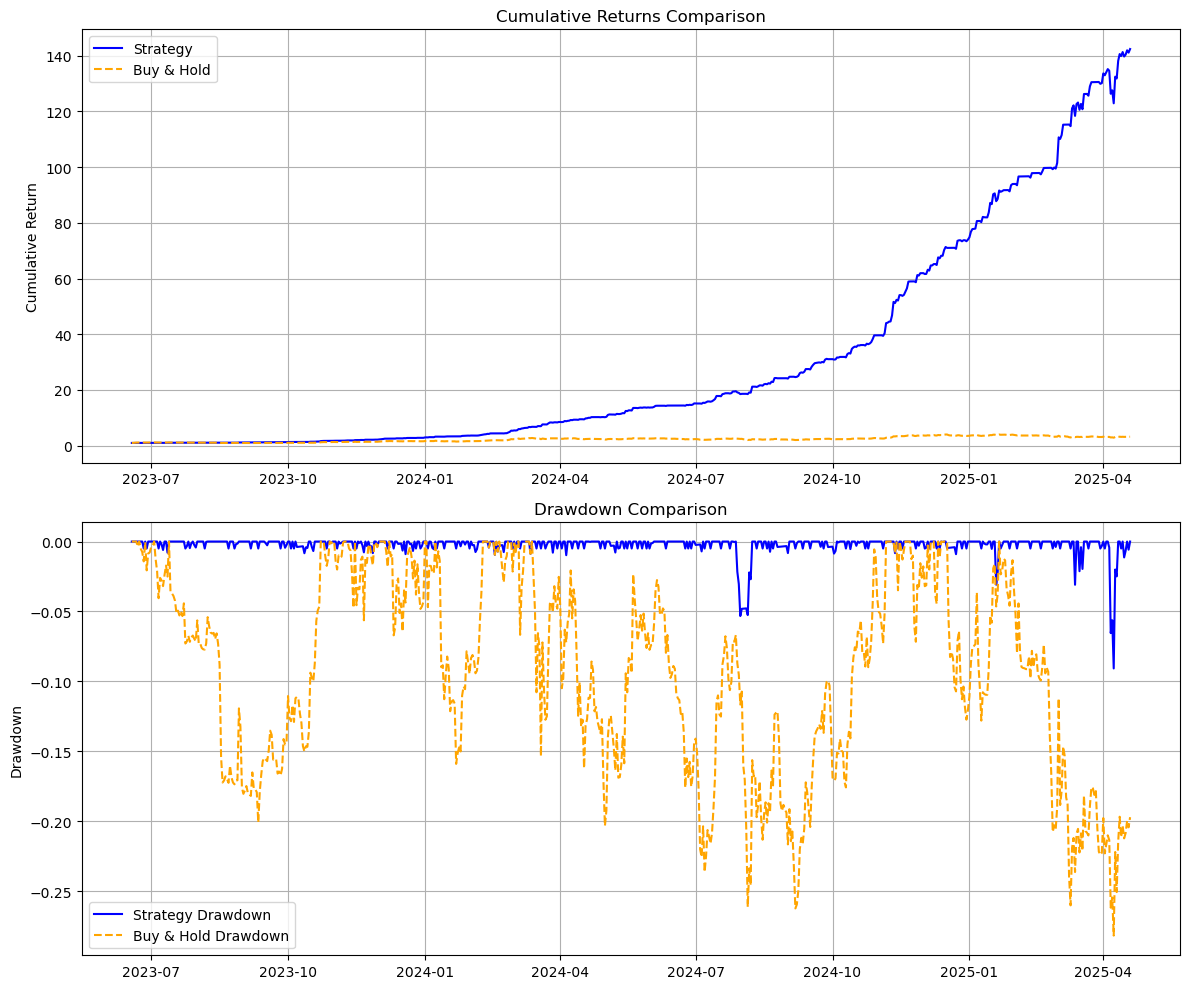

<Figure size 1000x600 with 0 Axes>

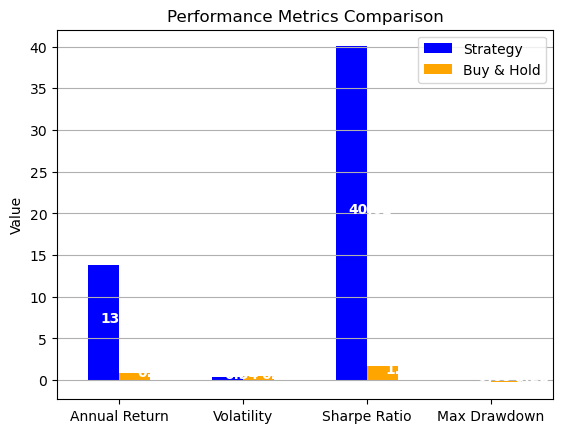

In [14]:
from trader import TradingSimulator

simulator = TradingSimulator(trade_data, initial_capital=10000, transaction_cost=0.005)
simulator.simulate(decision_method='highest_prob')
simulator.plot_portfolio_performance()
simulator.plot_performance_metrics()
